In [125]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, mean_squared_error as mse
from PIL import Image


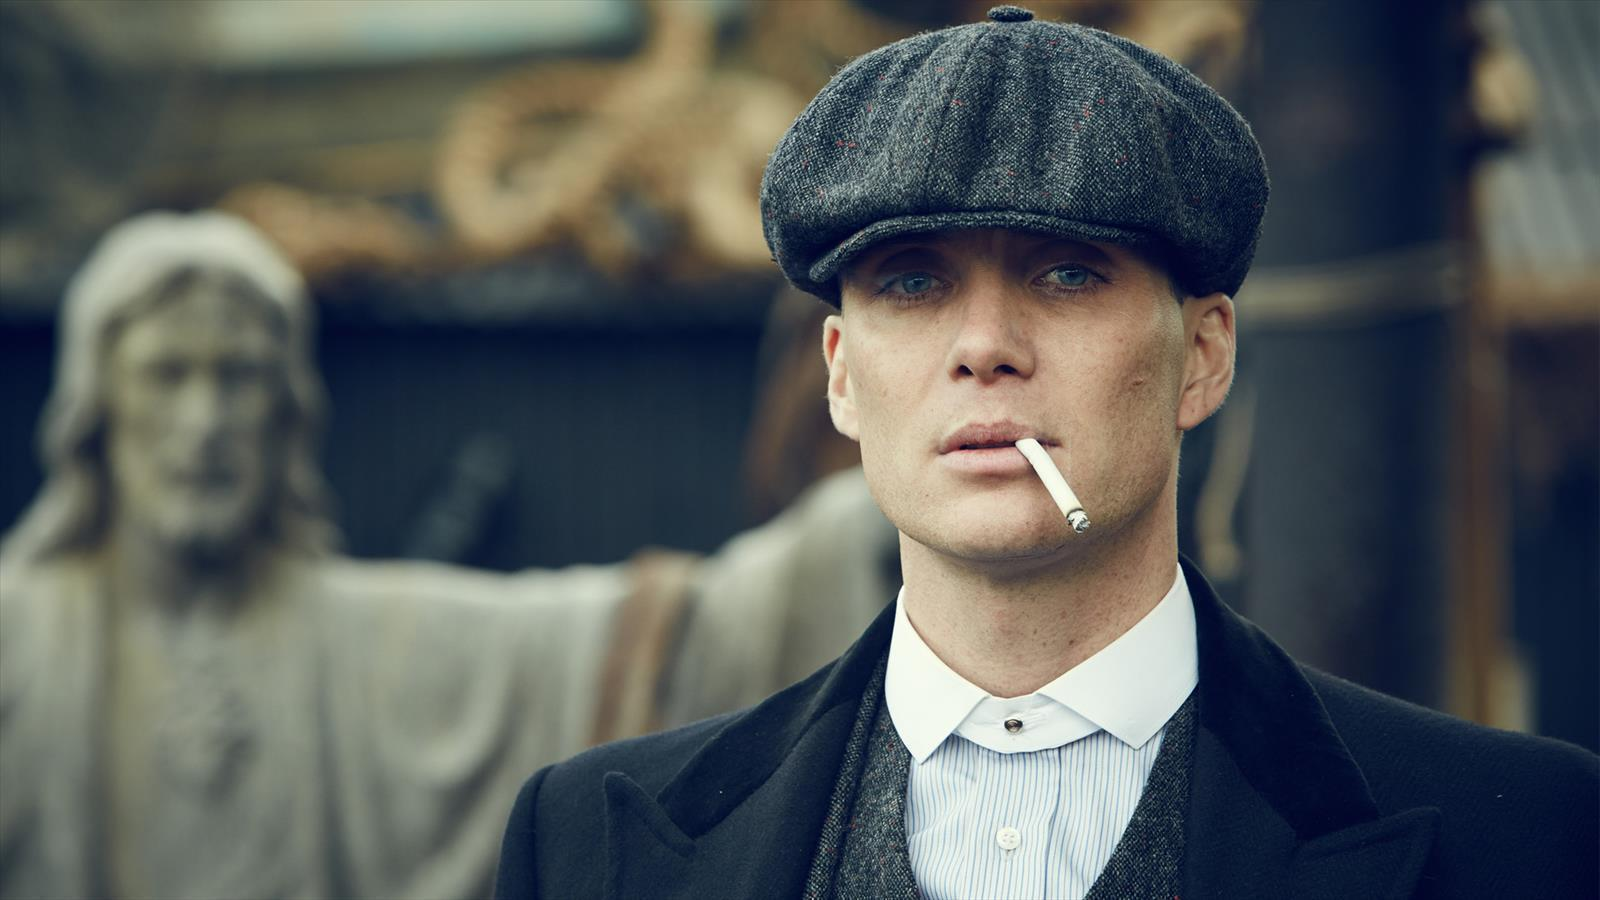

In [126]:
# Load the image

image = Image.open('ThomasShelby2.jpg')
# Simulating a random 1920x2400 colored image (3 channels: RGB)
# 1841 1227
# 1600 900
# 1365 2048

image

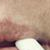

In [346]:

# Define the crop area (left, upper, right, lower)
# For example, to crop a 50x50 segment starting at (1000, 1200)

# # example 1
# patch_location_x = 1300
# patch_location_y = 650
# example 2
# patch_location_x = 1000
# patch_location_y = 400
# example 3
# patch_location_x = 800
# patch_location_y = 450
# example 4
# patch_location_x = 400
# patch_location_y = 450
# example 5
# patch_location_x = 800
# patch_location_y = 400
# example 6
# patch_location_x = 200
# patch_location_y = 450
# example 7
# patch_location_x = 200
# patch_location_y = 200
# example 8 , eye patch
patch_location_x = 200
patch_location_y = 200

patch_size_x = 50
patch_size_y = 50
crop_area = (patch_location_x, patch_location_y, patch_location_x+patch_size_x, patch_location_y+patch_size_y)

# Crop the image
cropped_image = image.crop(crop_area)
cropped_image2 = image.crop(crop_area)

# Save or display the cropped image
# cropped_image.show()  # To display
cropped_image.save('cropped_image.png')  # To save the cropped image

cropped_image


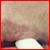

In [347]:
# get a patch highlighted


# Convert the image to RGBA (in case it's not in RGB mode)
cropped_image2 = cropped_image2.convert('RGB')

# Define border thickness and red color
border_thickness = 1  # You can adjust this value
red_color = (255, 0, 0)  # Red in RGBA

# Get image size
width, height = cropped_image2.size

# Load the pixels of the image
pixels = cropped_image2.load()

# Set red color on the border
for x in range(width):
    for y in range(height):
        # Top border
        if y < border_thickness:
            pixels[x, y] = red_color
        # Bottom border
        if y >= height - border_thickness:
            pixels[x, y] = red_color
        # Left border
        if x < border_thickness:
            pixels[x, y] = red_color
        # Right border
        if x >= width - border_thickness:
            pixels[x, y] = red_color

# Save or display the image with red border
# cropped_image2.show()  # To display the image
cropped_image2

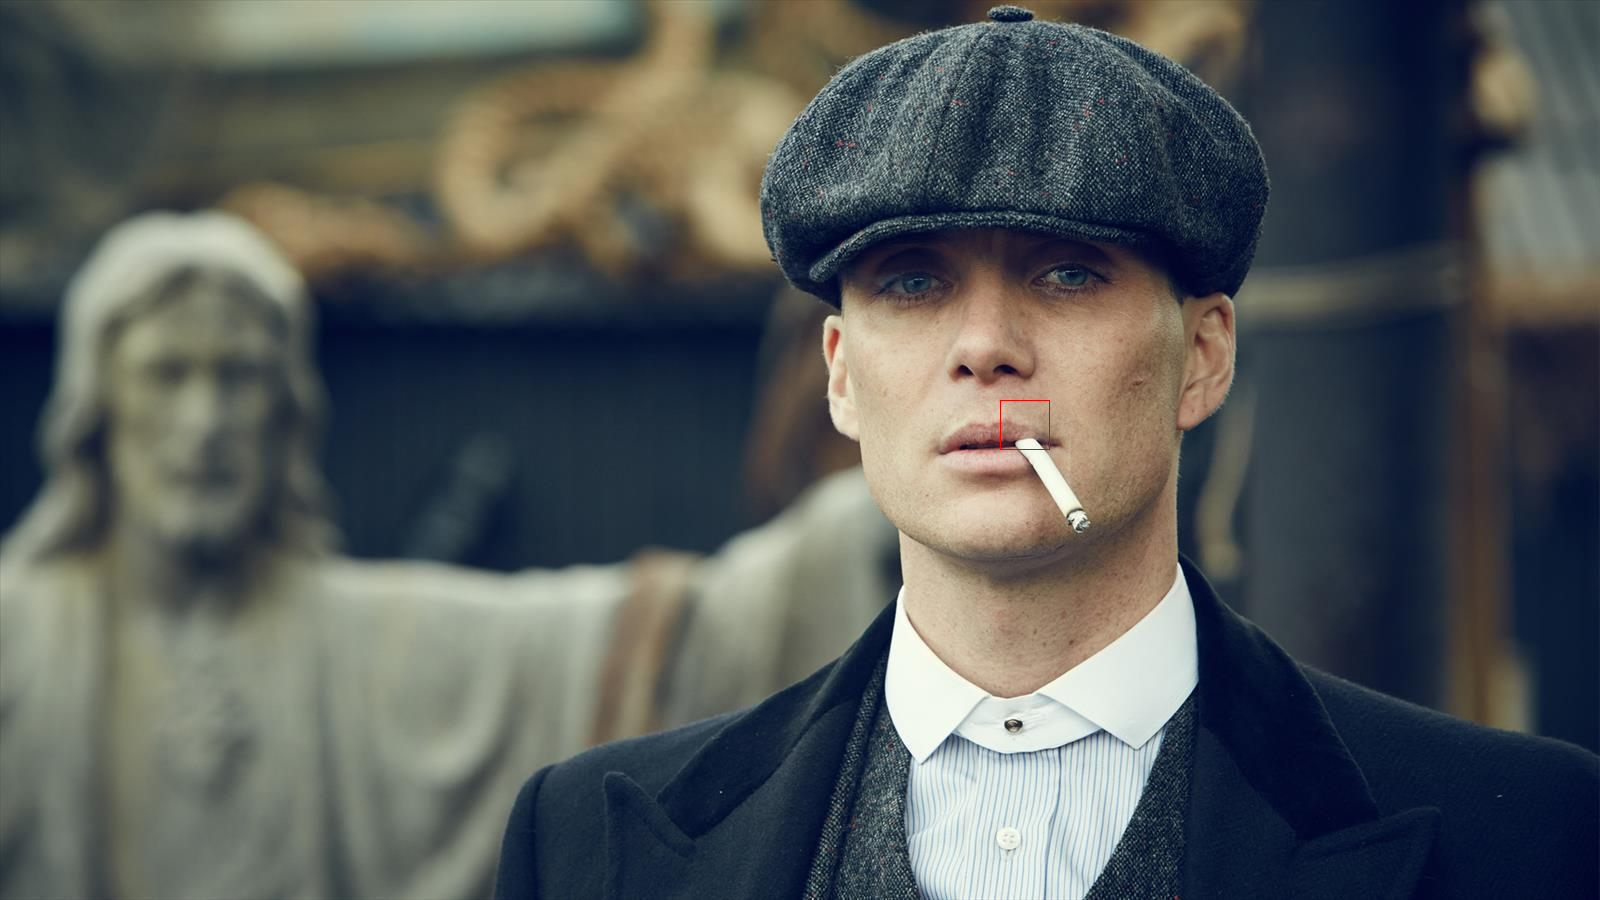

In [348]:
#show in bigger picture the crop.

# Load the main image and patch image
# image 
# cropped_image2

# Convert both images to NumPy arrays
main_np = np.array(image)
patch_np = np.array(cropped_image2)

# Specify the top-left location where the patch should be placed in the main image
top_left_x, top_left_y = patch_location_x, patch_location_y  # Example coordinates

# Get the dimensions of the patch
patch_height, patch_width, _ = patch_np.shape

# Place the patch on the main image
main_np[top_left_y:top_left_y+patch_height, top_left_x:top_left_x+patch_width] = patch_np

# Convert the modified NumPy array back to an image
main_image_with_patch = Image.fromarray(main_np)

# Save or display the modified image
# main_image_with_patch.show()  # To display
main_image_with_patch.save('main_image_location_identified.png')  # To save the image

main_image_with_patch


In [349]:

# Parameters
# N = 50  # Patch size
r_values = [5, 10, 25, 50]  # Different ranks for low-rank approximation 
# r_values = [5]
learning_rate = 0.00001
iterations = 10000

# Generating a random 50x50 patch for the simulation
np.random.seed(42)
original_patch = cropped_image  # Simulating the image patch


In [350]:
# matrix normalise

In [351]:
cropped_image_np = np.array(cropped_image)

# Split the image into R, G, B channels
def getRGB(cropped_image_np):
    R = cropped_image_np[:, :, 0]  # Red channel
    G = cropped_image_np[:, :, 1]  # Green channel
    B = cropped_image_np[:, :, 2]  # Blue channel

    # Now R, G, B are separate 2D arrays representing the color channels
    # print("Red Channel Shape:", R.shape)
    # print("Green Channel Shape:", G.shape)
    # print("Blue Channel Shape:", B.shape)
    
    return R,G,B


In [352]:

scale = 1
# Function to perform gradient descent to factorize matrix into W and H
def matrix_factorization(P, r, lr=learning_rate, iterations=iterations):
    N = P.shape[0]
    # Random initialization of W and H
    W = np.random.rand(N, r)*scale
    H = np.random.rand(r, N)*scale
    # 0.1 multiplied for small random values
    
    for _ in range(iterations):
        # Compute the gradient for W and H
        gradient_W = -2 * (P - W @ H) @ H.T
        gradient_H = -2 * W.T @ (P - W @ H)
        
        # Update W and H
        W -= lr * gradient_W
        H -= lr * gradient_H
        
        # W = np.nan_to_num(W, nan=0.0, posinf=255, neginf= 0)
        # H = np.nan_to_num(H, nan=0.0, posinf=255, neginf= 0)
        
        # W = np.clip(W, 0, 255)
        # H = np.clip(H, 0, 255)
    
    return W, H


In [353]:
# Prediction Matrix


R,G,B = getRGB(cropped_image_np)

# print(R.shape, B.shape)

In [354]:

# Evaluate RMSE and PSNR for each r
rmse_values = []
psnr_values = []
reconstructed_patches = []
height, width = B.shape
datatype = B.dtype

for r in r_values:
    # Get the shape of the r, g, b arrays


# Create an empty array with shape (height, width, 3) to hold the RGB image
    reconstructed_patch_np = np.zeros((height, width, 3), dtype= int)

    # Factorize the original patch
    WR, HR = matrix_factorization(R, r)
    WG, HG = matrix_factorization(G, r)
    WB, HB = matrix_factorization(B, r)
    
    # Reconstruct the patch
    reconstructed_patch_R = WR @ HR 
    reconstructed_patch_G = WG @ HG 
    reconstructed_patch_B = WB @ HB 
    
    # Assign the r, g, b arrays to the appropriate channels
    reconstructed_patch_np[:, :, 0] = reconstructed_patch_R  # Red channel
    reconstructed_patch_np[:, :, 1] = reconstructed_patch_G  # Green channel
    reconstructed_patch_np[:, :, 2] = reconstructed_patch_B  # Blue channel
    
    # print(reconstructed_patch_np)
    # reconstructed_patch = Image.fromarray(reconstructed_patch_np)
    # reconstructed_patch.show()
    reconstructed_patches.append(reconstructed_patch_np)
    
    # Compute RMSE
    rmse_value = np.sqrt(mse(cropped_image_np, reconstructed_patch_np))
    rmse_values.append(rmse_value)
    
    # Compute PSNR
    psnr_value = psnr(cropped_image_np, reconstructed_patch_np, data_range=1.0)  # max pixel value is 1.0
    psnr_values.append(psnr_value)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


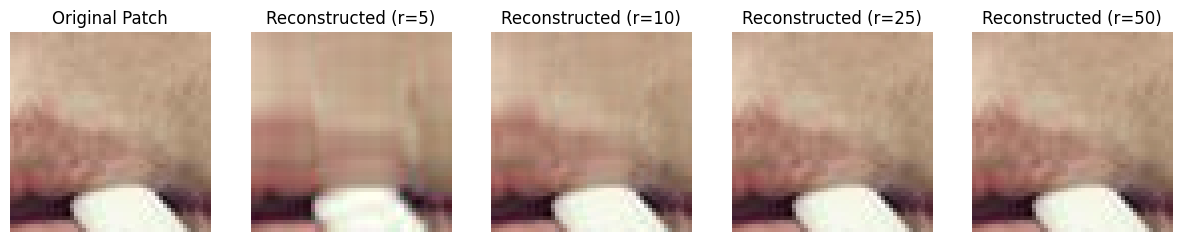

 For r = 5, the RMSE is 7.719, the PSNR is -17.751
 For r = 10, the RMSE is 3.568, the PSNR is -11.048
 For r = 25, the RMSE is 0.901, the PSNR is 0.904
 For r = 50, the RMSE is 0.709, the PSNR is 2.988


In [355]:

# Plot original and reconstructed patches
fig, axes = plt.subplots(1, len(r_values) + 1, figsize=(15, 5))
axes[0].imshow(original_patch, cmap='gray')
axes[0].set_title('Original Patch')
axes[0].axis('off')

for i, r in enumerate(r_values):
    axes[i+1].imshow(reconstructed_patches[i], cmap='gray')
    axes[i+1].set_title(f'Reconstructed (r={r})')
    axes[i+1].axis('off')

plt.show()

# rmse_values, psnr_values

for i in range(len(r_values)):
    print(f" For r = {r_values[i]}, the RMSE is {round(rmse_values[i], 3)}, the PSNR is {round(psnr_values[i], 3)}")


In [356]:
print(cropped_image_np)

[[[195 164 143]
  [194 163 142]
  [197 165 144]
  ...
  [203 173 147]
  [204 174 148]
  [199 169 143]]

 [[197 169 147]
  [196 168 146]
  [199 168 147]
  ...
  [199 169 143]
  [200 170 144]
  [196 166 140]]

 [[202 174 152]
  [201 173 151]
  [204 173 152]
  ...
  [195 165 139]
  [197 167 141]
  [194 164 138]]

 ...

 [[ 86  44  58]
  [ 89  43  56]
  [ 92  44  58]
  ...
  [161 124 116]
  [156 117 110]
  [137  98  93]]

 [[128  74  74]
  [135  81  79]
  [148  94  92]
  ...
  [149 117 104]
  [167 133 121]
  [156 120 106]]

 [[168 109 101]
  [172 115 106]
  [179 122 113]
  ...
  [167 139 125]
  [171 139 124]
  [163 132 114]]]


In [357]:
print(reconstructed_patches[0])

[[[209 178 157]
  [205 174 153]
  [205 173 152]
  ...
  [191 161 135]
  [191 163 136]
  [190 164 136]]

 [[209 179 157]
  [205 176 154]
  [205 175 153]
  ...
  [190 161 134]
  [191 163 136]
  [190 164 136]]

 [[210 180 158]
  [206 178 155]
  [206 176 154]
  ...
  [191 161 135]
  [192 163 137]
  [191 164 137]]

 ...

 [[ 92  47  62]
  [ 97  49  62]
  [105  55  68]
  ...
  [156 121 117]
  [151 116 112]
  [134 102  98]]

 [[134  86  84]
  [142  92  90]
  [149 100  98]
  ...
  [157 124 113]
  [166 125 117]
  [156 112 104]]

 [[158 105  95]
  [165 111 102]
  [171 119 111]
  ...
  [166 132 117]
  [177 137 125]
  [169 124 112]]]
